<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/stats_ch02_what_are_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries and define global settings
import numpy as np
import matplotlib.pyplot as plt

# define global figure properties used for publication
import matplotlib_inline.backend_inline as mb
mb.set_matplotlib_formats('svg')  # display figures in vector format

plt.rcParams.update({
    'font.size': 14,     # font size
    'savefig.dpi': 300,  # output resolution
    'axes.titlelocation': 'left', # title location
    'axes.spines.right': False,   # remove axis bounding box
    'axes.spines.top': False,     # remove axis bounding box
})

In [ ]:
# import MNIST data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, cache=False, parser='auto')

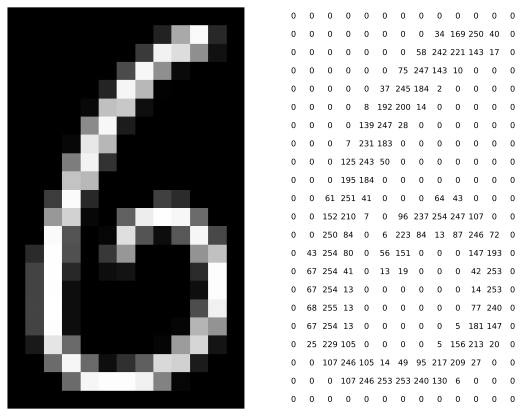

In [ ]:
# Show one number
_, axs = plt.subplots(1, 2, figsize=(8, 6))

# the image of the number
I = mnist.data[18].reshape(28, 28)[2:24, :][:, 8:-7]
axs[0].imshow(I, cmap='gray')
axs[0].axis('off')

axs[1].imshow(I, cmap='gray', vmin=-1, vmax=0)
axs[1].axis('off')

# and the numbers of the number
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    axs[1].text(j, i, int(I[i][j]), fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.savefig('whatR_mnist.png')
plt.show()

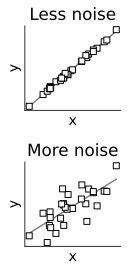

In [ ]:
# generate data
n = 30
x = np.random.randn(n)
y1 = x + np.random.randn(n)/10
y2 = x + np.random.randn(n)

_, axs = plt.subplots(2, 1, figsize=(2, 4))

axs[0].plot(x, np.polyval(np.polyfit(x, y1, 1), x), color='gray')
axs[0].plot(x, y1, 'ws', markeredgecolor='k')
axs[0].set_title('Less noise', loc='center')

axs[1].plot(x, np.polyval(np.polyfit(x, y2, 1), x), color='gray')
axs[1].plot(x, y2, 'ws', markeredgecolor='k')
axs[1].set_title('More noise', loc='center')

for a in axs:
  a.set_xticks([])
  a.set_xlabel('x')
  a.set_yticks([])
  a.set_ylabel('y')

plt.tight_layout()
plt.savefig('whatR_noisyData.png')
plt.show()

In [ ]:
np.polyval(np.polyfit(x, y2, 1), x)

array([-0.30439446, -0.20325091, -0.46230349,  2.34596353, -1.17008905,
       -0.89880497,  0.73528921, -0.72718322, -1.51310989,  0.63230886,
       -2.7263702 , -0.78569658,  1.22701109, -0.71944213, -0.71486623,
       -1.91879339,  1.64117754, -1.67662406, -1.55325579,  1.0153353 ,
        0.57037749, -1.47579131, -0.52254927, -0.63129701, -0.83621009,
        1.79404243, -1.50406627,  0.3135323 ,  1.00833812,  0.34148338])

In [ ]:
np.polyfit(x, y2, 1)

array([ 0.92442638, -0.09629329])

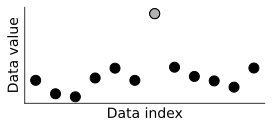

In [ ]:
X = np.random.randn(12)
X[6] = 2*np.pi

plt.figure(figsize=(4, 2))
plt.plot(X, 'ko', markersize=10)
plt.plot(6, X[6], 'ko', markersize=10, markerfacecolor=(.7, .7, .7))
plt.xticks([])
plt.yticks([])
plt.ylim([np.min(X)-.6, np.max(X)+.6])
plt.xlabel('Data index')
plt.ylabel('Data value')

plt.tight_layout()
plt.savefig('whatR_outlier.png')
plt.show()

In [ ]:
import numpy as np
from numpy import ndarray
from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)

In [ ]:
TEST_ALL = False

In [ ]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
data.shape

(506, 13)

In [ ]:
target.shape

(506,)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [ ]:
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [ ]:
y_train.shape

(354, 1)

In [ ]:
y_test.shape

(152, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt


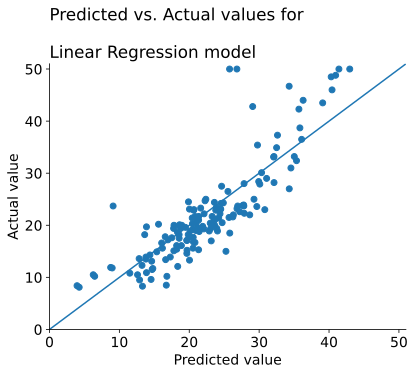

In [ ]:
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title("Predicted vs. Actual values for\n\nLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);

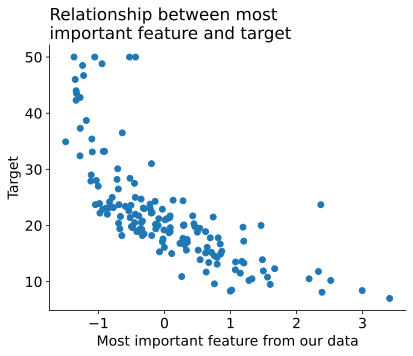

In [ ]:
plt.scatter(X_test[:, 12], y_test)
plt.xlabel('Most important feature from our data')
plt.ylabel('Target')
plt.title("Relationship between most\nimportant feature and target");

In [ ]:
def mae(preds: ndarray, y: ndarray) -> float:
  return np.mean(np.abs(preds - y))

def rmse(preds: ndarray, y: ndarray) -> float:
  return np.sqrt(np.mean((preds - y)**2))

In [ ]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.5671 
Root mean squared error: 5.0476


In [ ]:
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

In [ ]:
def forward_linear_regression(X_batch: ndarray, y_batch: ndarray, weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
  '''
  Forward pass for the step-by-step linear regression.
  '''
  # assert batch sies of X and y are equal
  assert X_batch.shape[0] == y_batch.shape[0]

  # assert that matrix multiplication can work
  assert X_batch.shape[1] == weights['W'].shape[0]

  # assert that B is simply a 1x1 ndarray
  assert weights['B'].shape[0] == weights['B'].shape[1] == 1

  # Compute the operation on the forward pass
  N = np.dot(X_batch, weights['W'])   # X(10, 5), W(5, 2)

  P = N + weights['B']

  loss = np.mean(np.power(y_batch - P, 2))

  # Save the information computed on the forward pass
  forward_info: Dict[str, ndarray] = {}
  forward_info['X'] = X_batch
  forward_info['N'] = N
  forward_info['P'] = P
  forward_info['y'] = y_batch

  return loss, forward_info

In [ ]:
def to_2d_np(a: ndarray, type: str = 'col') -> ndarray:
  '''
  Turns a 1D tensor into 2D
  '''
  assert a.ndim == 1, "Input tensors must be 1 dimensional"

  if type == 'col':
    return a.reshape(-1, 1)
  elif type == 'row':
    return a.reshape(1, -1)

In [ ]:
def permute_data(X: ndarray, y: ndarray) -> Tuple[ndarray, ndarray]:
  '''
  Randomly permute the data.
  '''
  perm = np.random.permutation(X.shape[0])
  return X[perm], y[perm]

In [ ]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute dLdW and dLdB for the step-by-step linear regression model.
    '''
    batch_size = forward_info['X'].shape[0]

    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])

    dPdB = np.ones_like(weights['B'])

    dLdN = dLdP * dPdN

    dNdW = np.transpose(forward_info['X'], (1, 0))

    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)
    dLdW = np.dot(dNdW, dLdN)

    # need to sum along dimension representing the batch size:
    # see note near the end of the chapter
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB

    return loss_gradients

In [ ]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray,
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]

    return X_batch, y_batch

In [ ]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    '''
    N = np.dot(X, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [ ]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model.
    '''

    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)

    weights['W'] = W
    weights['B'] = B

    return weights


In [ ]:
def train(X: ndarray,
          y: ndarray,
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          seed: int = 1) -> None:
    '''
    Train model for a certain number of epochs.
    '''
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)

    if return_losses:
        losses = []

    for i in range(n_iter):

        # Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0

        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size

        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights

    return None
train_info = train(X_train, y_train,
                   n_iter = 1000,
                   learning_rate = 0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   seed=180708)
losses = train_info[0]
weights = train_info[1]

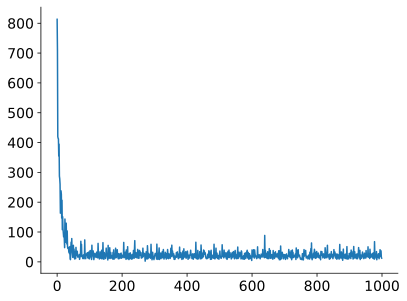

In [ ]:
plt.plot(list(range(1000)), losses);

In [ ]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
    '''
    Generate predictions from the step-by-step linear regression model.
    '''

    N = np.dot(X, weights['W'])

    return N + weights['B']

In [ ]:
preds = predict(X_test, weights)

In [ ]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.5644 
Root mean squared error: 5.0497


In [ ]:
np.round(y_test.mean(), 4)

np.float64(22.0776)

In [ ]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

np.float64(0.2287)

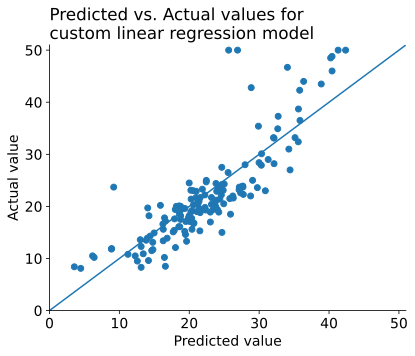

In [ ]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "01_linear_custom_pred_vs_actual.png");

In [ ]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, weights)[:, 0]

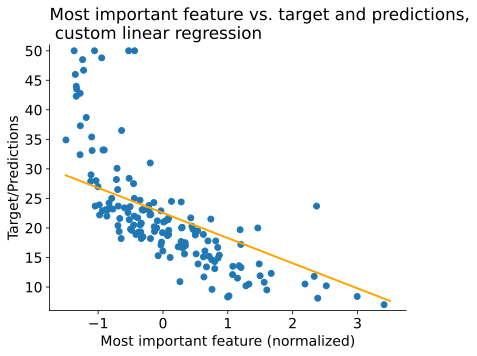

In [ ]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "03_most_important_feature_vs_predictions.png")

In [ ]:
np.round(weights['W'].reshape(-1), 4)

array([-1.0954,  0.7353,  0.1977,  0.7475, -2.2849,  2.2006,  0.7195,
       -2.6384,  2.5358, -1.6892, -2.3162,  0.8435, -4.2553])

In [ ]:
np.round(lr.coef_, 4)

array([[-1.0148,  0.7065,  0.276 ,  0.7092, -2.206 ,  2.3793,  0.7133,
        -2.6625,  2.6325, -1.8172, -2.3266,  0.8465, -4.1889]])

In [ ]:
np.round(weights['B'], 4)

array([[22.6312]])

In [ ]:
np.round(lr.intercept_, 4)

array([22.6195])